Step 1: Import Libraries andData Collection


In [1]:
#importing necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

# Load the dataset
data = pd.read_csv('Amazon Sales data.csv')

# Display the first few rows to understand the data structure
data.head()




,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
# Display basic information about the dataset
data.info()

# Get summary statistics of numerical columns
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


Step 2: Data Preprocessing

In [4]:
# Check the misssing value in each column

data.isnull().sum()

# Handle missing values
# For example, fill missing values with forward fill or mean
#data.fillna(method='ffill', inplace=True)


,0
Region,0
Country,0
Item Type,0
Sales Channel,0
Order Priority,0
Order Date,0
Order ID,0
Ship Date,0
Units Sold,0
Unit Price,0


In [5]:
# Convert date columns to datetime format

data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50


Step 3. Exploratory Data Analysis (EDA)


Region
Sub-Saharan Africa                   39672031.43
Europe                               33368932.11
Asia                                 21347091.02
Australia and Oceania                14094265.13
Middle East and North Africa         14052706.58
Central America and the Caribbean     9170385.49
North America                         5643356.55
Name: Total Revenue, dtype: float64


<ipython-input-6-f23228ada305>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette= 'viridis')


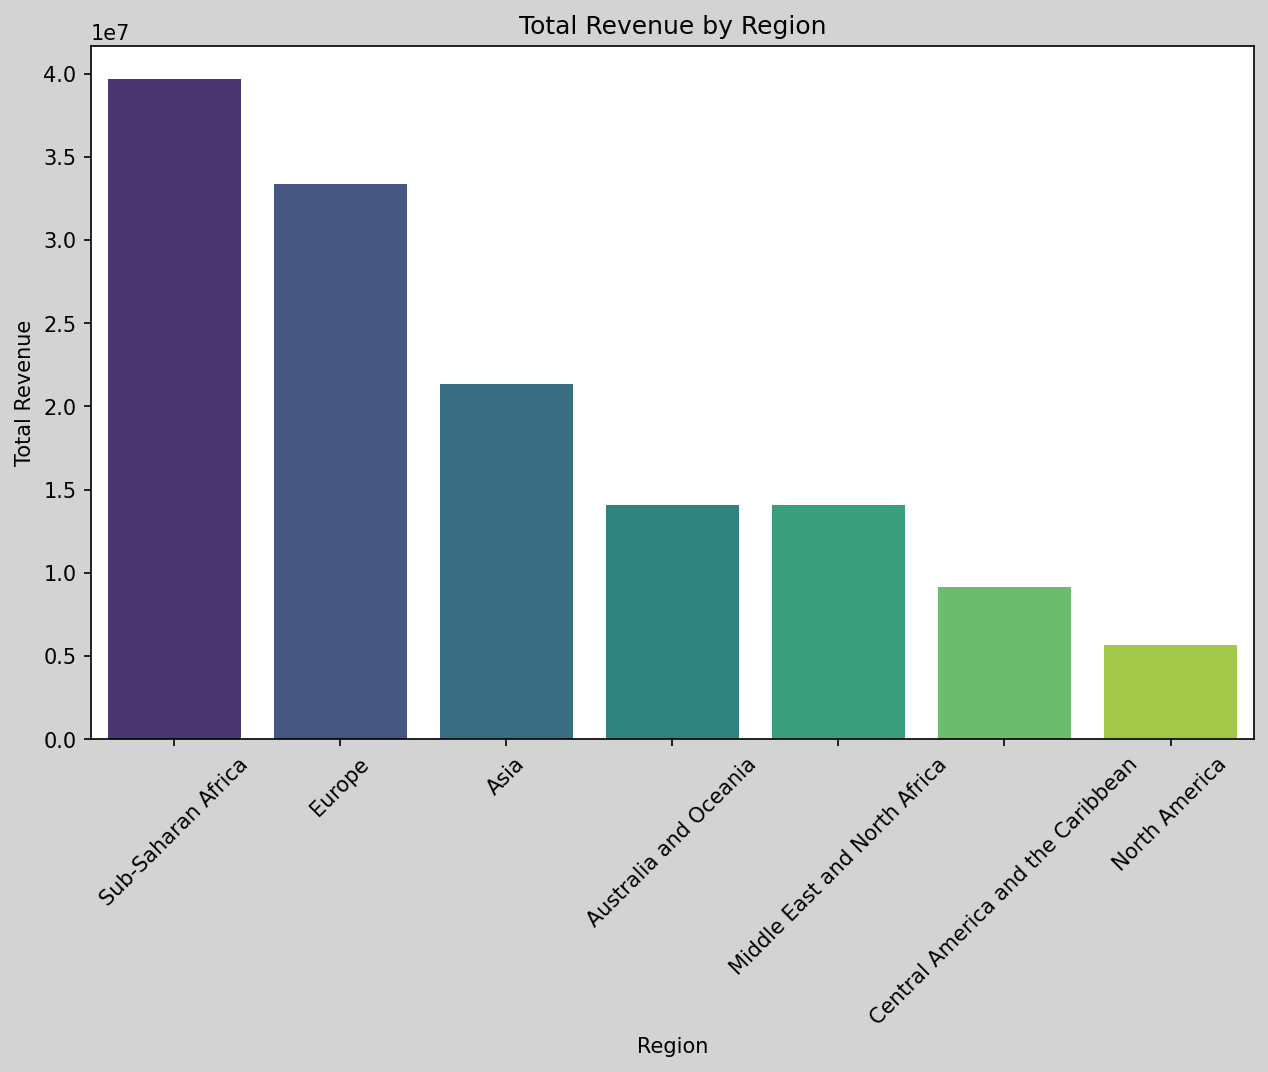

In [6]:
# Select only the numeric columns for correlation calculation
numeric_data = data.select_dtypes(include =['number'])

# Calculate the correlation Matrix
#numeric_data.corr()

# Analyze the distribution of sales by region
region_sales = data.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)
print(region_sales)

# Plotting the distribution of sales by region
plt.figure( num =1, figsize=(10, 6), dpi= 150, facecolor = 'lightgrey',)
sns.barplot(x=region_sales.index, y=region_sales.values, palette= 'viridis')
plt.title('Total Revenue by Region')
plt.xticks(rotation=45)
plt.ylabel('Total Revenue')
plt.show()



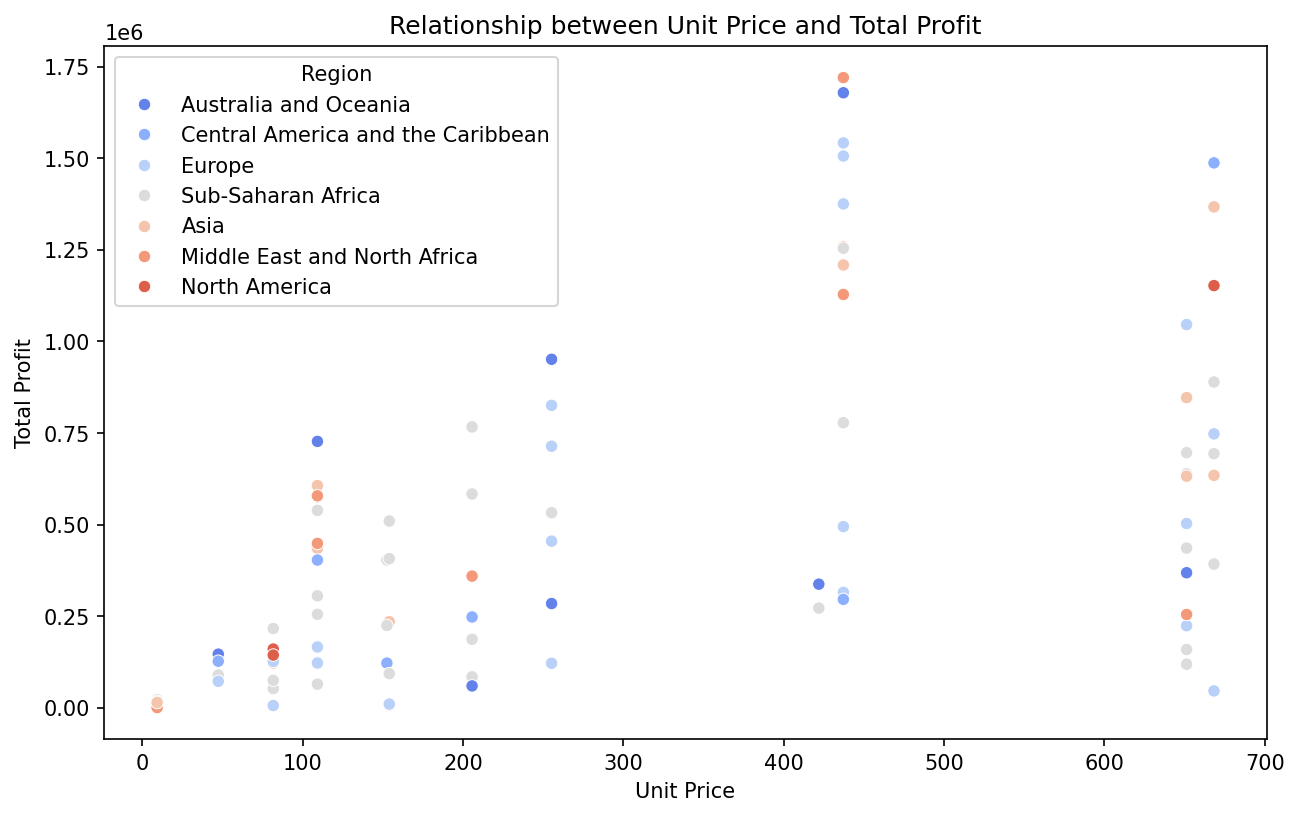

In [7]:
# Relationship between Unit Price and Total Profit
plt.figure(num = 2, figsize=(10, 6), dpi = 150)
sns.scatterplot(data=data, x='Unit Price', y='Total Profit', hue='Region', palette='coolwarm')
plt.title('Relationship between Unit Price and Total Profit')
plt.show()

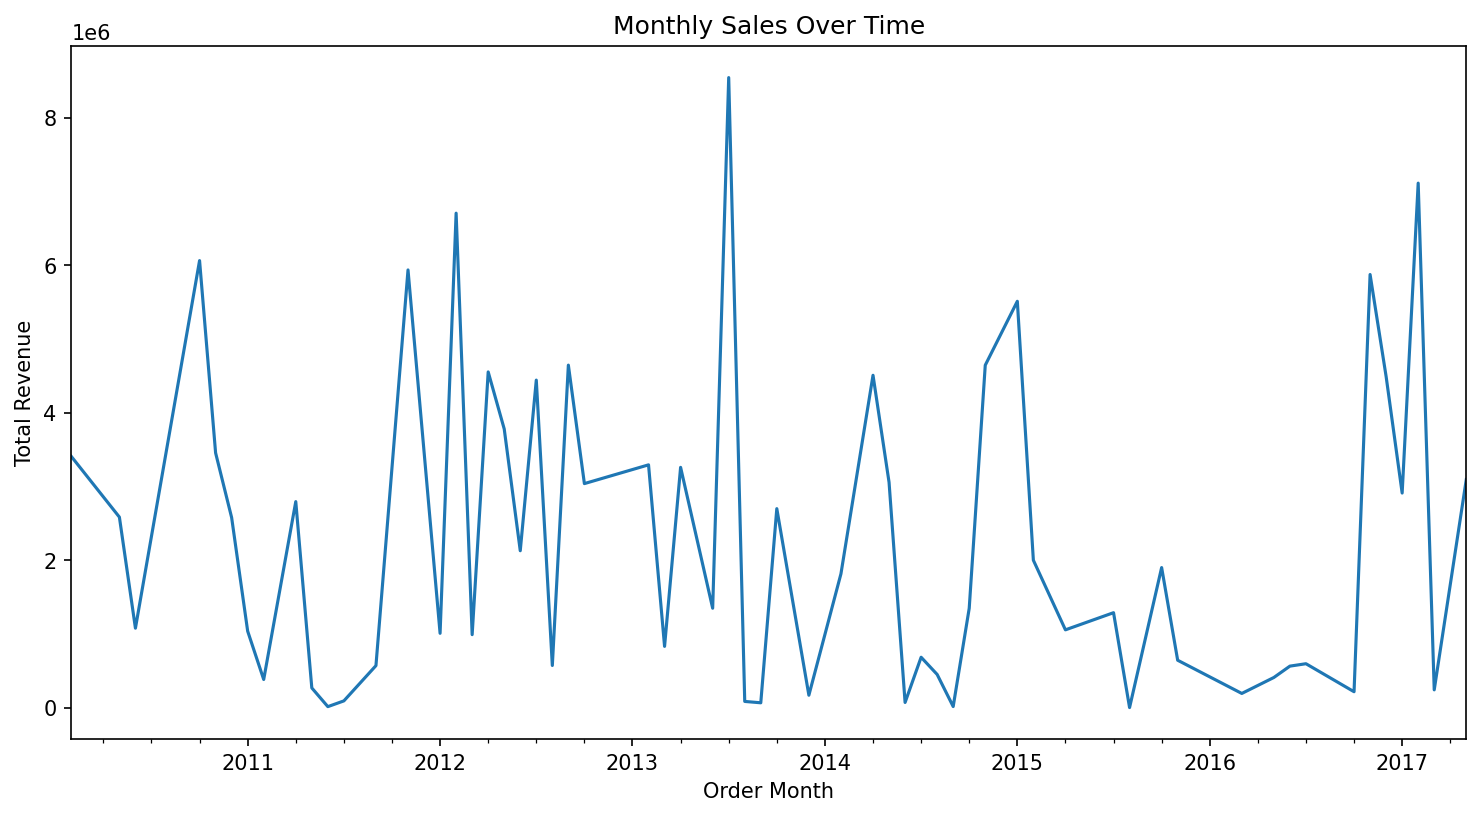

In [9]:
# Sales Over Time
data['Order Month'] = data['Order Date'].dt.to_period('M')
monthly_sales = data.groupby('Order Month')['Total Revenue'].sum()
plt.figure(num =3,figsize=(12, 6), dpi = 150)
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Order Month')
plt.ylabel('Total Revenue')
plt.show()

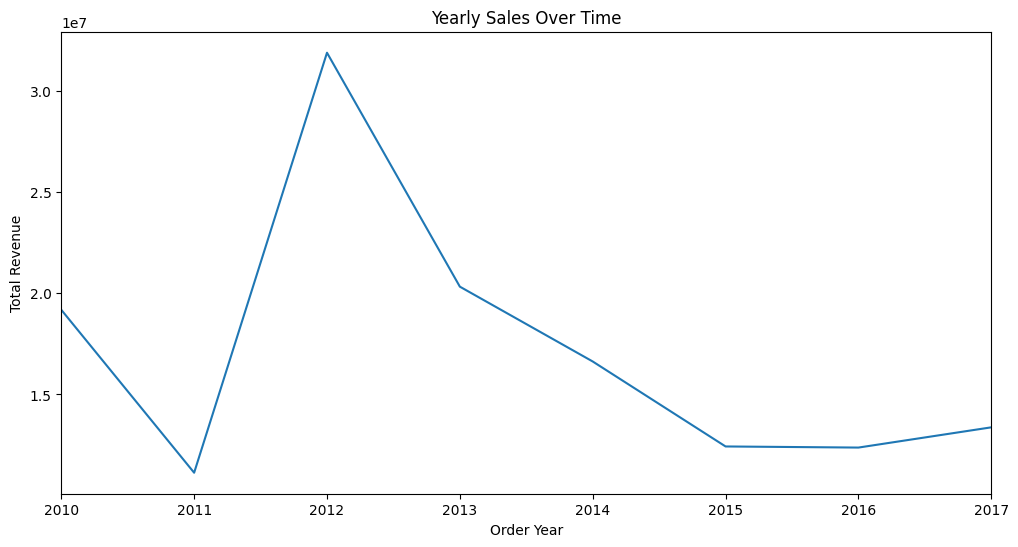

In [10]:
# Sales Over Time
data['Order Year'] = data['Order Date'].dt.to_period('Y')
Yearly_sales = data.groupby('Order Year')['Total Revenue'].sum()
plt.figure(figsize=(12, 6))
Yearly_sales.plot()
plt.title('Yearly Sales Over Time')
plt.xlabel('Order Year')
plt.ylabel('Total Revenue')
plt.show()

Step 4: Featrure Engineering


In [11]:
# Feature: Profit Margin
data['Profit Margin'] = data['Total Profit'] / data['Total Revenue']

# Feature: Order Year
#data['Order Year'] = data['Order Date'].dt.year

# Preview the new features
data[['Profit Margin', 'Order Year']].head()


,Profit Margin,Order Year
0,0.375509,2010
1,0.430676,2012
2,0.193870,2014
3,0.258307,2014
4,0.193870,2013


In [12]:


# Calculate Month-over-Month (MoM) Sales Growth
monthly_sales_growth = monthly_sales.pct_change().fillna(0) * 100
data = data.merge(monthly_sales_growth.rename('Sales Growth'), on='Order Month', how='left')

# Order Processing Time Calculation
# Calculate the difference between Ship Date and Order Date
data['Order Processing Time'] = (data['Ship Date'] - data['Order Date']).dt.days

# Discounted Price Calculation
# Assuming a 10% discount for simplicity
data['Discounted Price'] = data['Unit Price'] * 0.9
data['Discounted Revenue'] = data['Units Sold'] * data['Discounted Price']

# Preview the new features
print(data[['Sales Growth', 'Order Processing Time', 'Discounted Price', 'Discounted Revenue']].head())


   Sales Growth  Order Processing Time  Discounted Price  Discounted Revenue
0    -24.121067                     30           229.752         2280288.600
1    -87.024283                     24           185.130          519104.520
2    -32.151965                      6           586.089         1042652.331
3    -97.529958                     15             8.397           68032.494
4      8.354952                      5           586.089         2966782.518


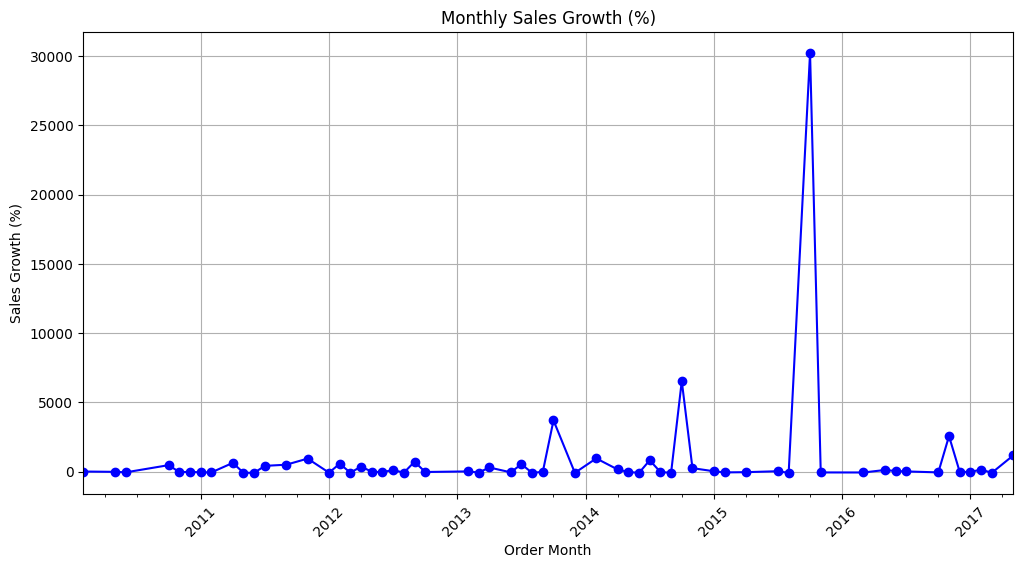

In [13]:
# vizualising features

# Plot Sales Growth Over Time
plt.figure(figsize=(12, 6))
monthly_sales_growth.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales Growth (%)')
plt.xlabel('Order Month')
plt.ylabel('Sales Growth (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


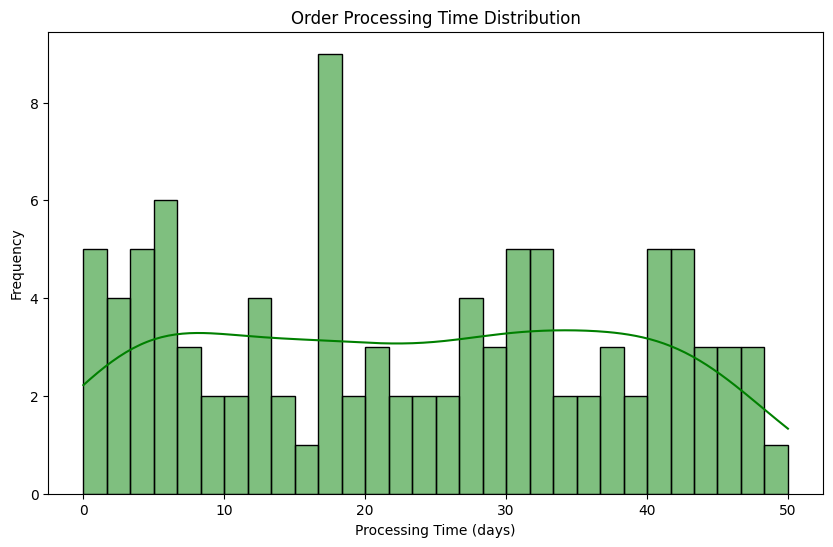

In [14]:

# Plot Order Processing Time Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Order Processing Time'], bins=30, kde=True, color='g')
plt.title('Order Processing Time Distribution')
plt.xlabel('Processing Time (days)')
plt.ylabel('Frequency')
plt.show()


<Figure size 1200x600 with 0 Axes>

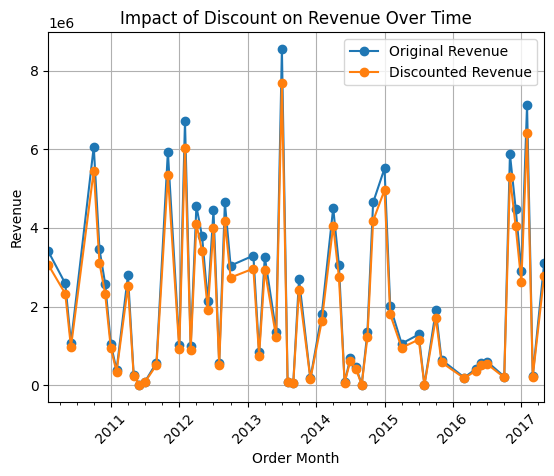

In [15]:
# Plot the impact of Discounted Price on Total Revenue
original_vs_discounted = pd.DataFrame({
    'Original Revenue': data.groupby('Order Month')['Total Revenue'].sum(),
    'Discounted Revenue': data.groupby('Order Month')['Discounted Revenue'].sum()
})

plt.figure(figsize=(12, 6))
original_vs_discounted.plot(kind='line', marker='o')
plt.title('Impact of Discount on Revenue Over Time')
plt.xlabel('Order Month')
plt.ylabel('Revenue')
plt.legend(['Original Revenue', 'Discounted Revenue'])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Step 5: Modelling


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
# Convert 'Order Year' to a numerical representation (e.g., integer year)
data['Order Year'] = data['Order Year'].dt.year


X = data[['Units Sold', 'Unit Price', 'Unit Cost', 'Profit Margin', 'Order Year']]
y = data['Total Profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


RMSE: 120068.27908445397
R²: 0.9137657541747976


step 5 : vizualization


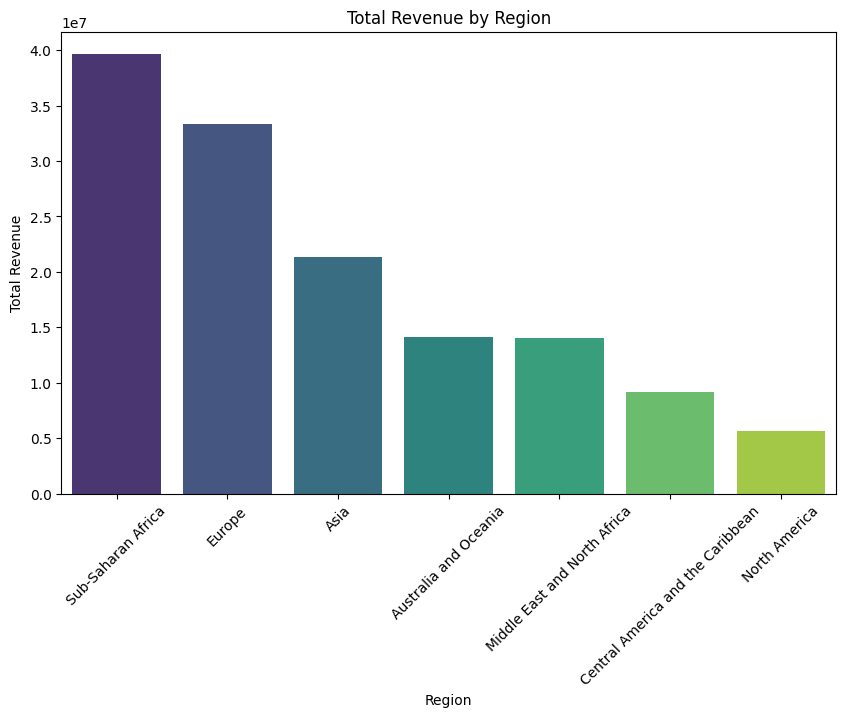

In [17]:
# Save a plot for the presentation
plt.figure(figsize=(10, 6))

#sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')
sns.barplot(x=region_sales.index, y=region_sales.values, hue=region_sales.index, palette='viridis', legend=False)
plt.title('Total Revenue by Region')
plt.xticks(rotation=45)
plt.ylabel('Total Revenue')
#plt.savefig('/mnt/data/revenue_by_region.png')
plt.show()
